# This script is a trial to recover scene setting from blender export. 
Follow Arpit Mitsuba-Blender add-on 
* https://github.com/mitsuba-renderer/mitsuba-blender/wiki/Exporting-a-Blender-scene
* https://github.com/CMURoboTouch/tactile_optical_simulation/tree/main

In [89]:
import mitsuba as mi
import matplotlib.pyplot as plt
import drjit as dr
import numpy as np

In [49]:
mi.variants()
mi.set_variant('scalar_rgb')

In [81]:
scene = mi.load_file("scenes/lemon_rotation.xml")


In [82]:
def render_the_scene(scene, plot_title="", save_fig=False, figname="sample_scene"):
    img = mi.render(scene, spp=256)
    print(f"rendering output shape: {img.shape} min {dr.min(img)} max {dr.max(img)}")
    image = img[..., :3]
    print(f"image range: min {dr.min(image)}, max: {dr.max(image)}")
    depth = img[..., 3]
    print(f"depth range: min {dr.min(depth)}, max: {dr.max(depth)}")
    normal = img[..., 4:7]
    print(f"normal range: min {dr.min(normal)}, max: {dr.max(normal)}")

    # plot the rendering
    # create a 1x3 subplot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image ** (1.0 / 2.2)); axes[0].set_title("image") # approximate sRGB tonemapping
    axes[1].imshow(depth, cmap="gray"); axes[1].set_title("depth")
    axes[2].imshow(normal*0.5+0.5); axes[2].set_title("normal") # map [-1, 1] -> [0, 1]

    plt.axis("off")
    plt.suptitle(plot_title)
    if save_fig:
        plt.savefig(f"{figname}.png", bbox_inches="tight", dpi=600)
    plt.show()

In [61]:
# # Export and check the output channels
# mi.util.write_bitmap("myscene.exr", img)
# sensor = scene.sensors()[0]
# multichannel = sensor.film().bitmap()
# print(f"check multichannel {type(multichannel)}")
# print(multichannel)

In [63]:
# # Plot a single color image

# plt.axis("off")
# plt.imshow(img/0.5 + 0.5)
# # plt.imshow(img ** (1.0 / 2.2)); # approximate sRGB tonemapping

rendering output shape: (1080, 1920, 7) min -0.9999793171882629 max 111.13375091552734
image range: min 0.0, max: 0.00023333368881139904
depth range: min 0.0, max: 111.13375091552734
normal range: min -0.9999793171882629, max: 0.7454789280891418


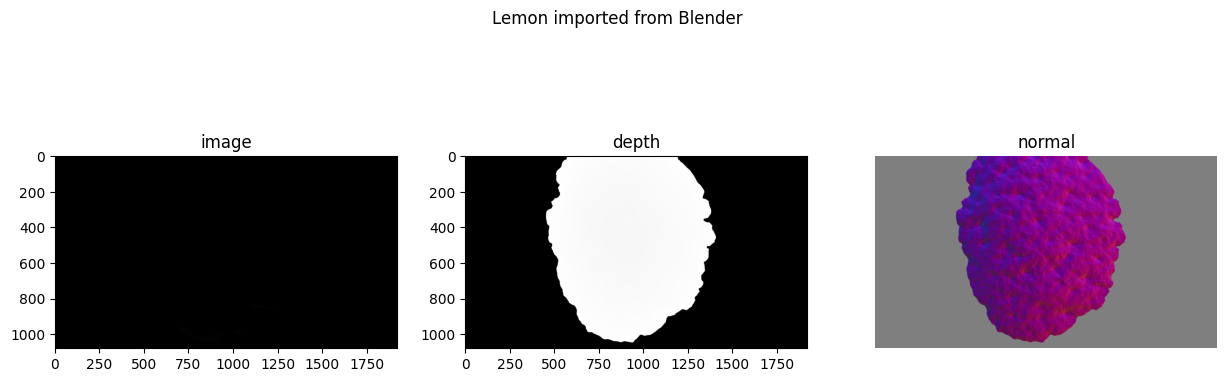

In [83]:
render_the_scene(scene, plot_title="Lemon imported from Blender", save_fig=True, figname="lemon_gs_in_blender")
# # save the rendered img
# mi.util.write_bitmap("my_first_render.png", img)

## Inspect the camera transform and parameterize the settings for multiple views
Ref: editing the scene in Mitsuba https://mitsuba.readthedocs.io/en/stable/src/rendering/editing_a_scene.html

In [84]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  --------------------------------------------------------------------------------------------
  Name                                     Flags    Type        Parent
  --------------------------------------------------------------------------------------------
  default-bsdf.brdf_0.reflectance.value    ∂        float       UniformSpectrum
  PointLight.sampling_weight                        float       PointLight
  PointLight.position                               Point3f     PointLight
  PointLight.intensity.value               ∂        Color3f     SRGBReflectanceSpectrum
  PerspectiveCamera.near_clip                       float       PerspectiveCamera
  PerspectiveCamera.far_clip                        float       PerspectiveCamera
  PerspectiveCamera.shutter_open                    float       PerspectiveCamera
  PerspectiveCamera.shutter_open_time               float       PerspectiveCamera
  PerspectiveCamera.film.size                       Vector2u    HDRFilm
  Pe

In [85]:
print(f"camera to_world {type(params['PerspectiveCamera.to_world'])} \n {params['PerspectiveCamera.to_world']}")
print(f"camera fov {params['PerspectiveCamera.x_fov']}")
current_tf = params['PerspectiveCamera.to_world']

camera to_world <class 'mitsuba.scalar_rgb.Transform4f'> 
 [[-0.99846, 0.0236203, 0.0502017, -2.68248],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [0.0236688, 0.99972, 0.000372143, 2.21238],
 [0, 0, 0, 1]]
camera fov 24.90667724609375


## Edit the transformation
Ref: Mitsuba transformation toolbox: https://mitsuba.readthedocs.io/en/stable/src/how_to_guides/transformation_toolbox.html

[[0.0236689, 0.99972, 0.000372136, 2.21238],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [0.99846, -0.0236204, -0.0502017, 2.68248],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999907612800598 max 112.72807312011719
image range: min 0.0, max: 0.00020265010243747383
depth range: min 0.0, max: 112.72807312011719
normal range: min -0.9999907612800598, max: 0.7986755967140198


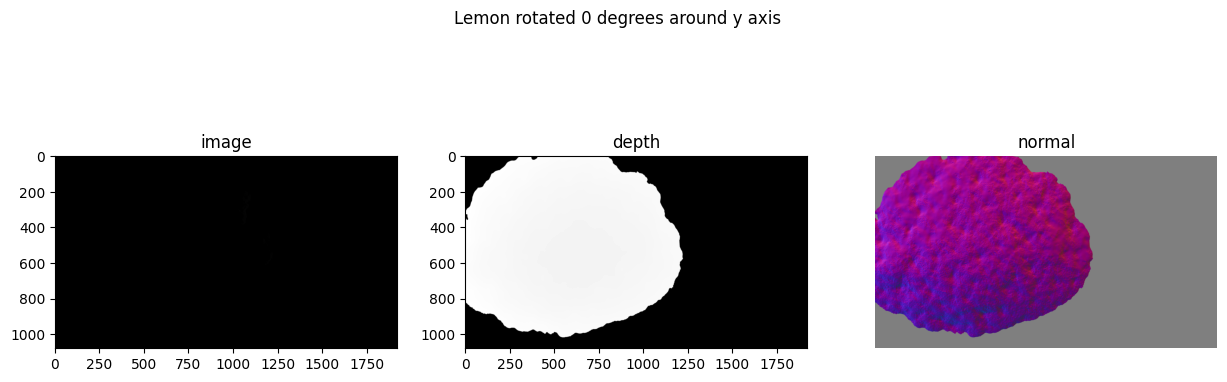

[[0.722754, 0.690207, -0.0352348, 3.46119],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [0.689281, -0.723611, -0.0357611, 0.332415],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999838471412659 max 113.13460540771484
image range: min 0.0, max: 0.00023184731253422797
depth range: min 0.0, max: 113.13460540771484
normal range: min -0.9999838471412659, max: 0.7975797057151794


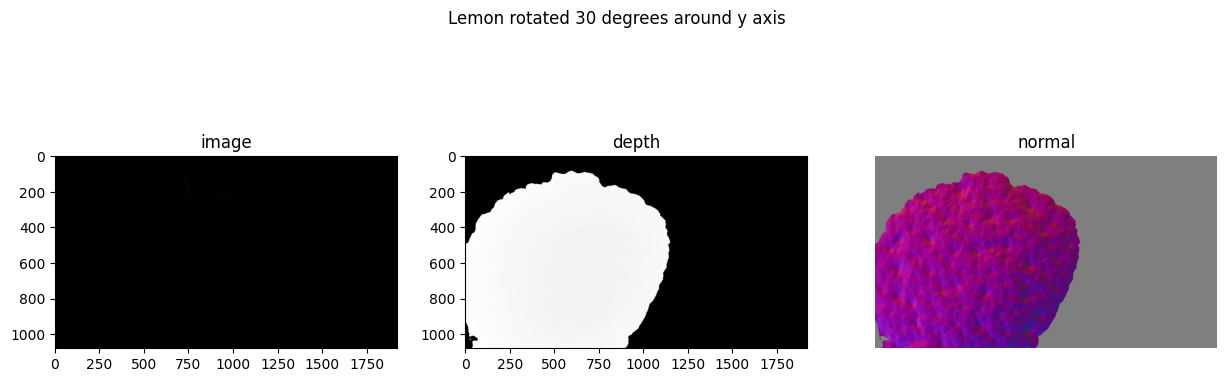

[[0.99846, -0.0236204, -0.0502017, 2.68248],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [-0.023669, -0.99972, -0.00037213, -2.21238],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999704360961914 max 112.56505584716797
image range: min 0.0, max: 0.0002478688256815076
depth range: min 0.0, max: 112.56505584716797
normal range: min -0.9999704360961914, max: 0.7775424718856812


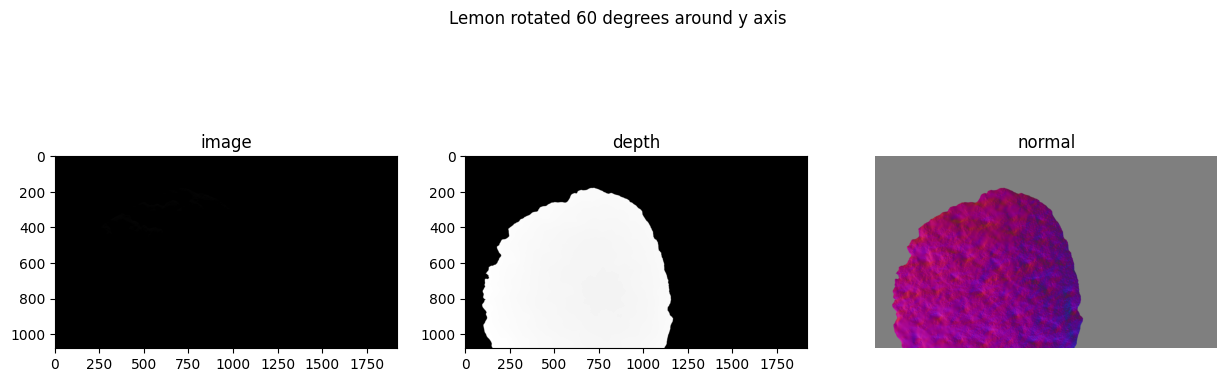

[[0.689281, -0.723611, -0.0357611, 0.332415],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [-0.722754, -0.690207, 0.0352348, -3.46119],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999808073043823 max 111.772705078125
image range: min 0.0, max: 0.0002862261899281293
depth range: min 0.0, max: 111.772705078125
normal range: min -0.9999808073043823, max: 0.7523508071899414


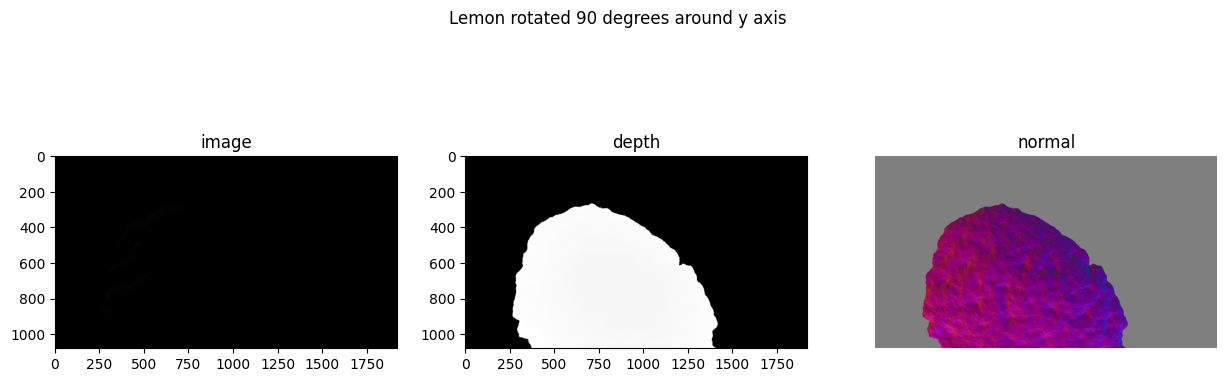

[[-0.0236691, -0.99972, -0.000372125, -2.21238],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [-0.99846, 0.0236205, 0.0502017, -2.68248],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999732375144958 max 111.1921615600586
image range: min 0.0, max: 0.0003130410041194409
depth range: min 0.0, max: 111.1921615600586
normal range: min -0.9999732375144958, max: 0.7688199877738953


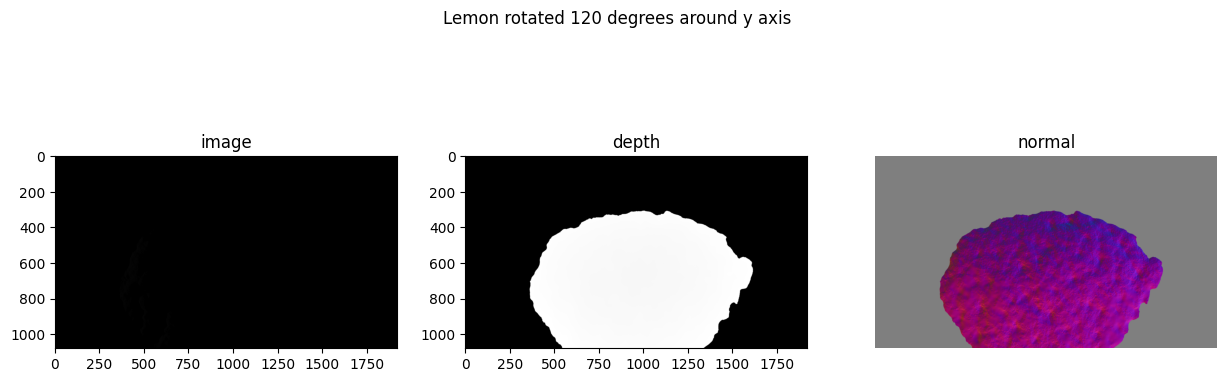

[[-0.722754, -0.690207, 0.0352348, -3.46119],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [-0.689281, 0.723611, 0.0357611, -0.332415],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999736547470093 max 111.10010528564453
image range: min 0.0, max: 0.0003110641264356673
depth range: min 0.0, max: 111.10010528564453
normal range: min -0.9999736547470093, max: 0.8029371500015259


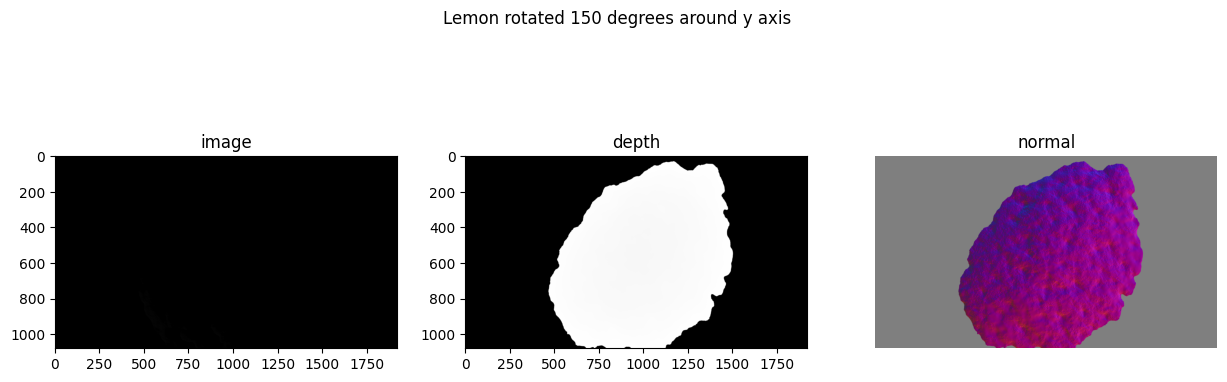

[[-0.99846, 0.0236206, 0.0502017, -2.68248],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [0.0236692, 0.99972, 0.000372121, 2.21238],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999793171882629 max 111.13375854492188
image range: min 0.0, max: 0.00023333368881139904
depth range: min 0.0, max: 111.13375854492188
normal range: min -0.9999793171882629, max: 0.7454900145530701


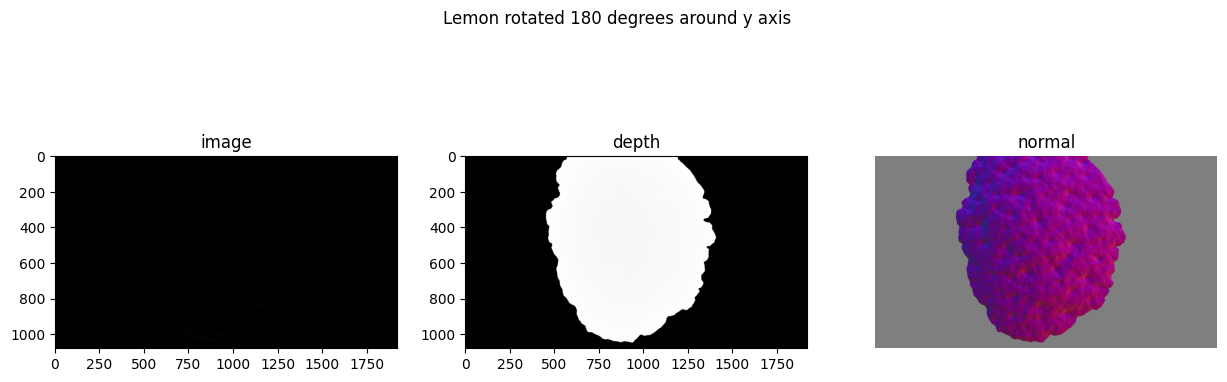

[[-0.689281, 0.723611, 0.0357611, -0.332414],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [0.722754, 0.690207, -0.0352348, 3.46119],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999772906303406 max 112.49716186523438
image range: min 0.0, max: 0.00020168957416899502
depth range: min 0.0, max: 112.49716186523438
normal range: min -0.9999772906303406, max: 0.8033897876739502


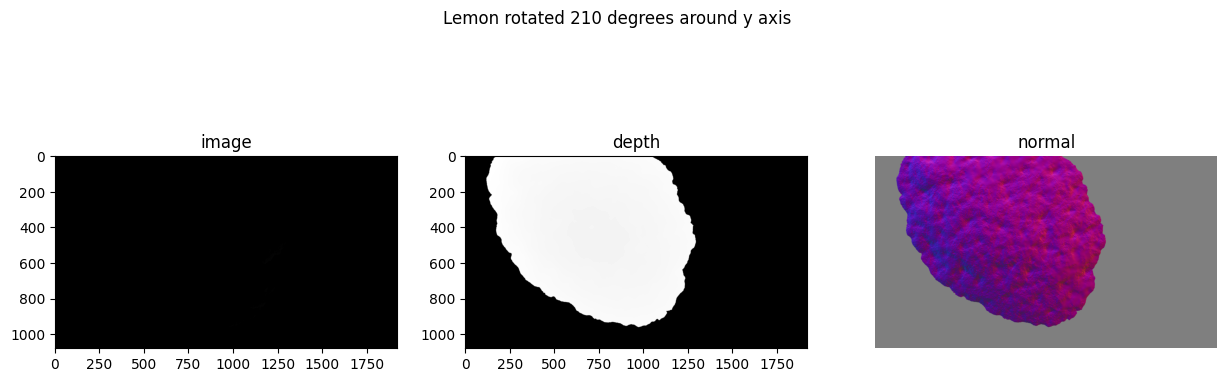

[[0.0236692, 0.99972, 0.000372116, 2.21238],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [0.99846, -0.0236207, -0.0502017, 2.68248],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999907612800598 max 112.72807312011719
image range: min 0.0, max: 0.00020265014609321952
depth range: min 0.0, max: 112.72807312011719
normal range: min -0.9999907612800598, max: 0.7997193336486816


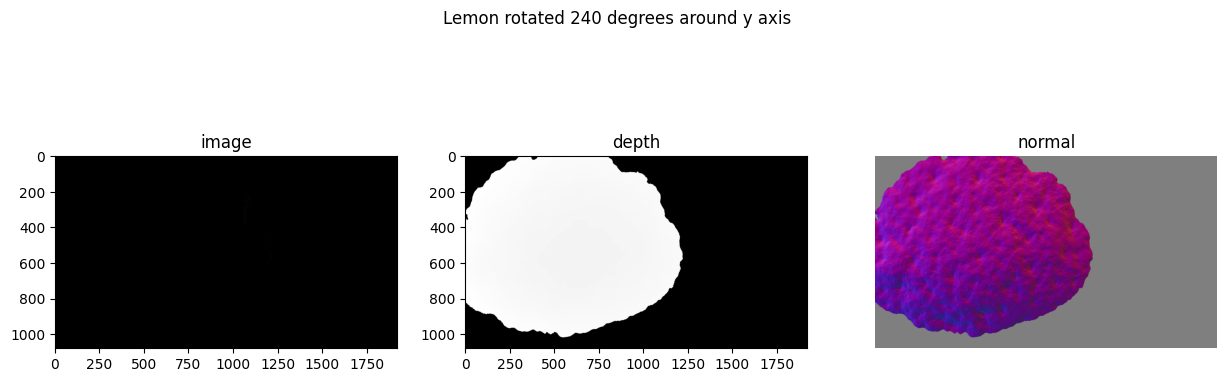

[[0.722754, 0.690206, -0.0352348, 3.46119],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [0.689281, -0.723611, -0.0357611, 0.332414],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999837279319763 max 113.13460540771484
image range: min 0.0, max: 0.00023184744350146502
depth range: min 0.0, max: 113.13460540771484
normal range: min -0.9999837279319763, max: 0.7975797057151794


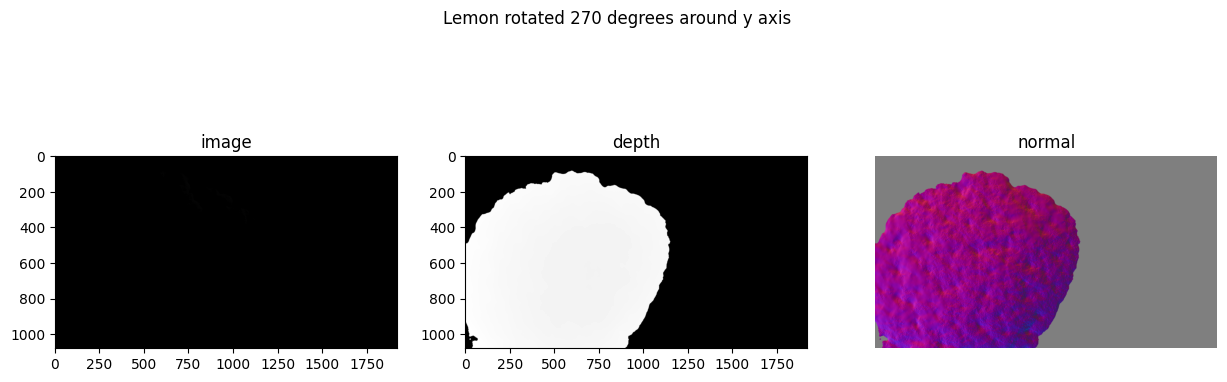

[[0.99846, -0.0236208, -0.0502017, 2.68248],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [-0.0236694, -0.99972, -0.00037211, -2.21238],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999704360961914 max 112.56505584716797
image range: min 0.0, max: 0.0002478688838891685
depth range: min 0.0, max: 112.56505584716797
normal range: min -0.9999704360961914, max: 0.7775363326072693


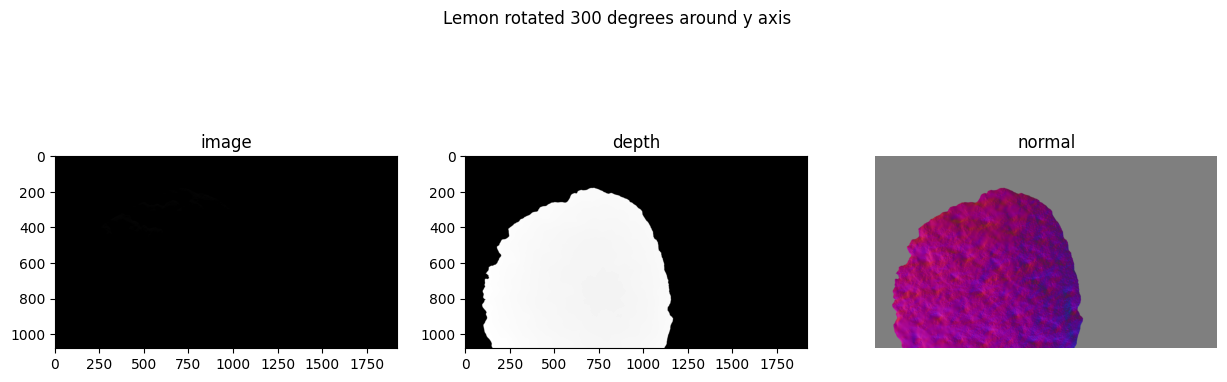

[[0.689281, -0.723611, -0.0357611, 0.332414],
 [0.0501788, -0.00155978, 0.998739, -144.891],
 [-0.722755, -0.690206, 0.0352348, -3.46119],
 [0, 0, 0, 1]]
rendering output shape: (1080, 1920, 7) min -0.9999808073043823 max 111.772705078125
image range: min 0.0, max: 0.0002862266555894166
depth range: min 0.0, max: 111.772705078125
normal range: min -0.9999808073043823, max: 0.7523527145385742


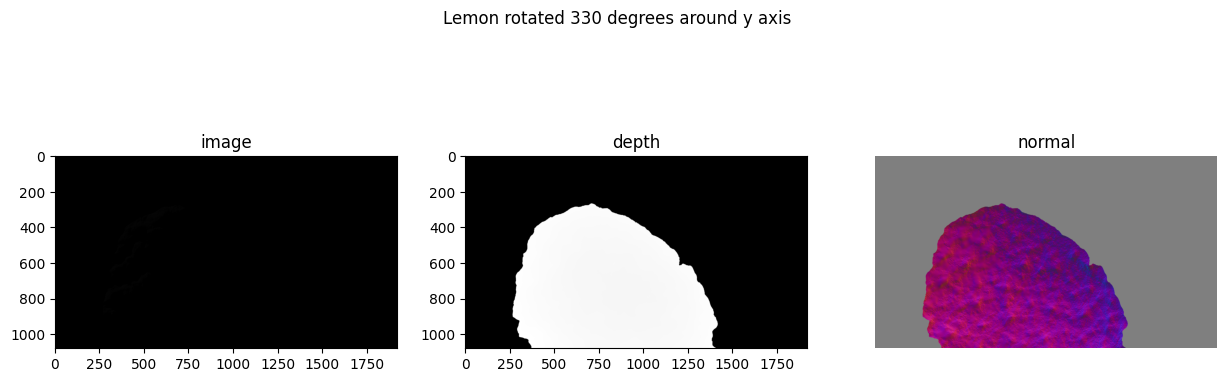

In [91]:
for angle in np.arange(0,360,30):
    rot = mi.Transform4f.rotate(axis=[0, 1, 0], angle=45)
    new_tf = rot @ current_tf
    print(new_tf)
    params['PerspectiveCamera.to_world'] = new_tf
    # Apply changes
    params.update();
    render_the_scene(scene, plot_title=f"Lemon rotated {angle} degrees around y axis", save_fig=True, figname=f"lemon_gs_rotate_{angle}.png")